In [1]:
from ucimlrepo import fetch_ucirepo 

# faz o fetch do dataset 
dataset = fetch_ucirepo(id=17)

# dados (pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 0. Pré-processamento

In [2]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [3]:
atributos_object = X.dtypes == 'object'
atributos_object = X.columns[atributos_object]
atributos_object

Index([], dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

for atributo in atributos_object:
    X[atributo] = LabelEncoder().fit_transform(X[atributo])

In [5]:
y = LabelEncoder().fit_transform(y)
y[:15]

/home/danbrz/Projects/Aprendizado_Distribuido/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.preprocessing import MinMaxScaler

for atributo in X.columns:
    X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])

/tmp/ipykernel_284189/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_284189/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_284189/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

## 1. Redução de Dimensionalidade

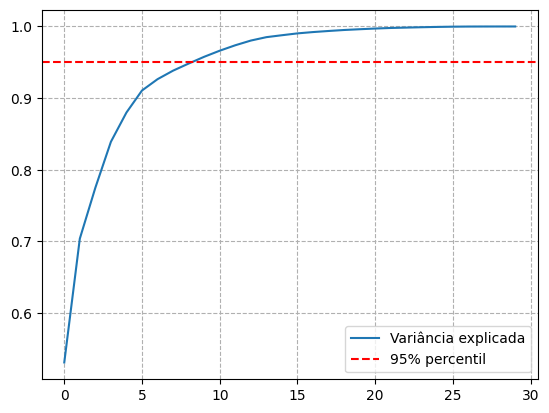

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variância explicada')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentil')
plt.grid(True, linestyle='--')
plt.legend()

In [8]:
pca   = PCA(n_components=8)
X_pca = pca.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.4, random_state=99
)

## 2. Classificadores

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


classificadores = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'LR' : LogisticRegression(),
    'NB' : GaussianNB()
}

In [11]:
import time

acuracia_treino = {}
tempo_treino    = {}

for clf in classificadores:
    start_time = time.process_time()
    classificadores[clf].fit(X_train, y_train)
    acuracia_treino[clf] = classificadores[clf].score(X_train, y_train)
    tempo_treino[clf]    = time.process_time() - start_time

Text(0.5, 1.0, 'Tempo Treinamento')

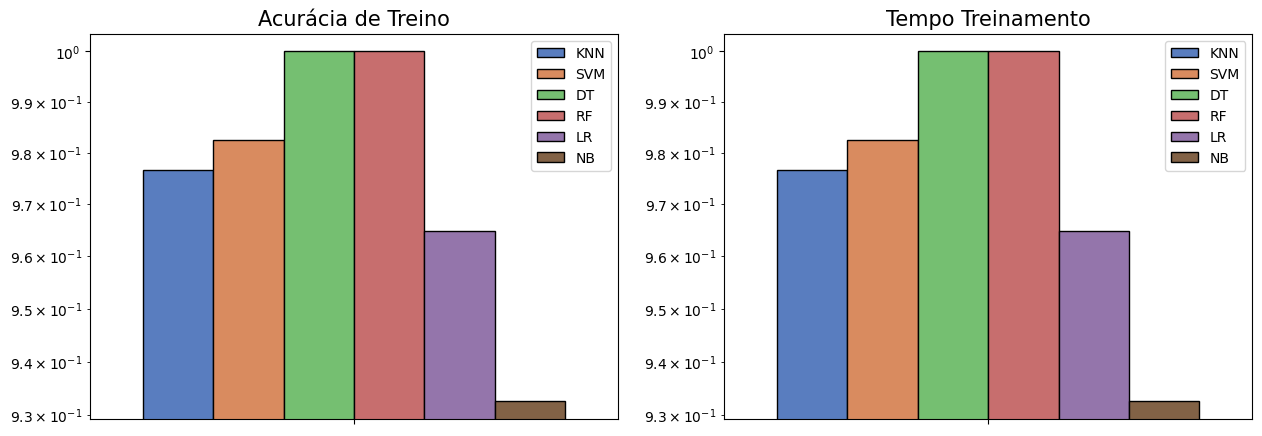

In [12]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(hue=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[0], ec='k', palette='muted')
sns.barplot(hue=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[1], ec='k', palette="muted")

ax[0].set_yscale('log')
ax[0].set_title('Acurácia de Treino', size=15)

ax[1].set_yscale('log')
ax[1].set_title('Tempo Treinamento', size=15)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metricas = {}

for clf in classificadores:
    metricas[clf] = {}
    classificadores[clf].fit(X_train, y_train)
    predictions   = classificadores[clf].predict(X_val)
    metricas[clf]['accuracy']  = accuracy_score(y_val, predictions)
    metricas[clf]['precision'] = precision_score(y_val, predictions)
    metricas[clf]['recall']    = recall_score(y_val, predictions)
    metricas[clf]['f1']        = f1_score(y_val, predictions)

resultado = pd.DataFrame(metricas)

In [ ]:
resultado

,KNN,SVM,DT,RF,LR,NB
accuracy,0.973684,0.969298,0.942982,0.956140,0.978070,0.938596
precision,0.960526,0.948052,0.909091,0.934211,0.973333,0.918919
recall,0.960526,0.960526,0.921053,0.934211,0.960526,0.894737
f1,0.960526,0.954248,0.915033,0.934211,0.966887,0.906667


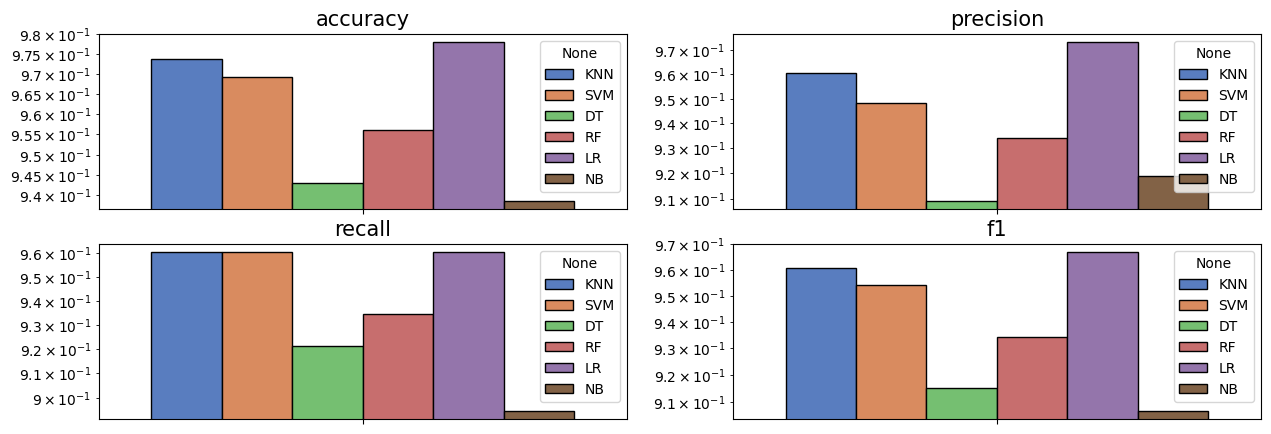

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

for i in range(4):
    sns.barplot(hue=resultado.columns, y=resultado.iloc[i].tolist(), ax=ax[i//2][i%2], ec='k', palette='muted')

    ax[i//2][i%2].set_yscale('log')
    ax[i//2][i%2].set_title(resultado.index[i], size=15)